In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn import tree

data = pd.read_csv('car_evaluation.csv', sep=',', header=0)


In [3]:
data.head(5)
data.rename(columns={'low':'safety',"small":"lug_boot","2.1":"number of persons","2":"number of doors","vhigh":"buying price","vhigh.1":"maintenance cost"},inplace=True)

In [4]:
print("Dataset length: ", len(data))
print(data.shape)
data.info()
data.head()

Dataset length:  1727
(1727, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying price       1727 non-null   object
 1   maintenance cost   1727 non-null   object
 2   number of doors    1727 non-null   object
 3   number of persons  1727 non-null   object
 4   lug_boot           1727 non-null   object
 5   safety             1727 non-null   object
 6   unacc              1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
from sklearn.preprocessing import LabelEncoder
li = list(data.columns)
labelencoder = LabelEncoder()
for i in li:
    data[i] = labelencoder.fit_transform(data[i])
data.head()

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [5]:
#Seperateing the Target variable
X = data.values[:, :-1]
print(X)

[[3 3 0 0 2 2]
 [3 3 0 0 2 0]
 [3 3 0 0 1 1]
 ...
 [1 1 3 2 0 1]
 [1 1 3 2 0 2]
 [1 1 3 2 0 0]]


In [6]:
Y = data.values[:, -1]
print(Y)

[2 2 2 ... 2 1 3]


In [7]:
#Splitting dataset into Test and Train
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=1)


In [8]:
print(X_train)

[[1 0 3 1 1 1]
 [1 3 0 2 2 2]
 [0 3 0 1 1 1]
 ...
 [2 2 0 1 0 0]
 [3 2 0 2 2 0]
 [2 0 3 1 2 1]]


# Decision Tree Classifier

In [9]:
#Function to perform training with Entropy
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state=100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

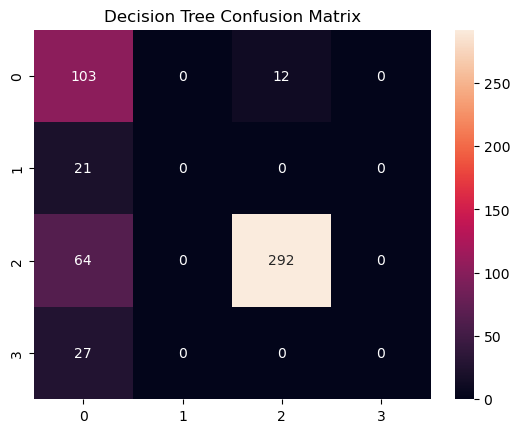

In [10]:
Y_pred1 = clf_entropy.predict(X_test)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(confusion_matrix(Y_test, Y_pred1), annot=True, fmt='g')
plt.show()

In [11]:
print("Accuracy is ", accuracy_score(Y_test, Y_pred1)*100)

Accuracy is  76.10789980732177


# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
Y_pred2 = rf.predict(X_test)

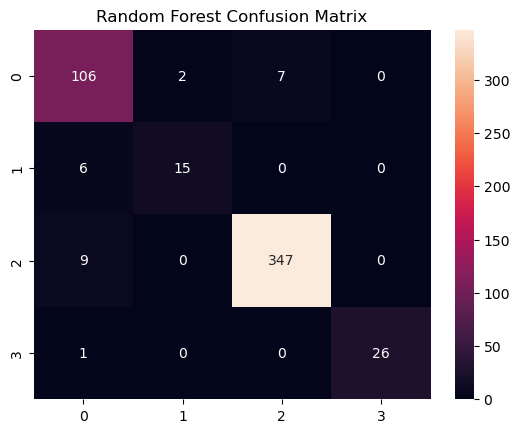

In [14]:
plt.title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(Y_test, Y_pred2), annot=True, fmt='g')
plt.show()

In [15]:
print("Accuracy is ", accuracy_score(Y_test, Y_pred2)*100)

Accuracy is  95.18304431599229


# KNN Classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
Y_pred3 = knn.predict(X_test)

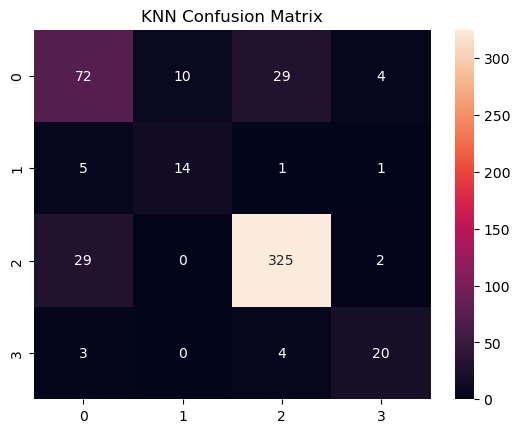

In [17]:
plt.title("KNN Confusion Matrix")
sns.heatmap(confusion_matrix(Y_test, Y_pred3), annot=True, fmt='g')
plt.show()

In [18]:
print("Accuracy is ", accuracy_score(Y_test, Y_pred3)*100)

Accuracy is  83.04431599229287


# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [20]:
lr.fit(X_train, Y_train)
Y_pred4 = lr.predict(X_test)

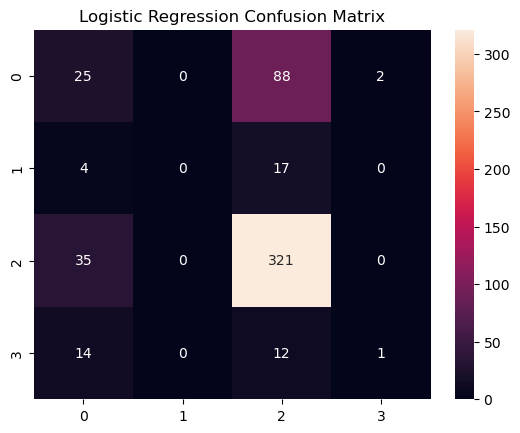

In [21]:
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_matrix(Y_test, Y_pred4), annot=True, fmt='g')
plt.show()

In [22]:
print("Accuracy is ", accuracy_score(Y_test, Y_pred4)*100)

Accuracy is  66.85934489402698
